<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/Ranosz_testowy/pum_23_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


data = datasets.load_iris()

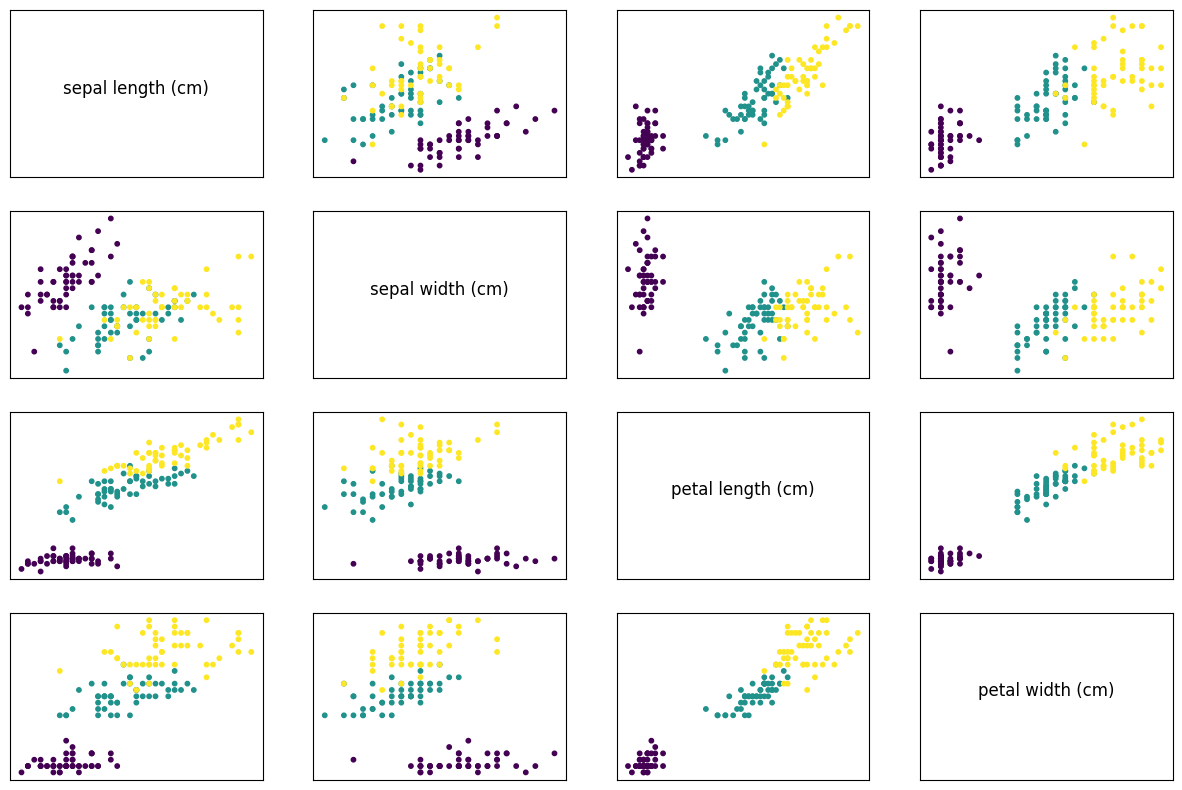

In [ ]:
# 1.Zwizualizuj dane

# Wyodrębnienie cech i etykiet
features = data.data
feature_names = data.feature_names
targets = data.target
target_names = data.target_names

# Tworzenie wykresów dla różnych par cech
plt.figure(figsize=(15, 10))
for i in range(4):
    for j in range(4):
        plt.subplot(4, 4, i * 4 + j + 1)
        if i == j:
            plt.text(0.5, 0.5, feature_names[i], fontsize=12, ha='center')
        else:
            plt.scatter(features[:, j], features[:, i], c=targets, cmap='viridis', s=10, marker='o')
        plt.xticks([])
        plt.yticks([])
plt.show()

In [ ]:
# 2. Sprawdź, który z podziałów jest lepszy w przypadku miary entropii:
# a) petal width (cm)na poziomie: 0.5
# b) petal width (cm)na poziomie: 0.38 Podaj zysk informacyjny na każdym z podziałów

# Funkcja do obliczania entropii
def entropy(labels):
    values, counts = np.unique(labels, return_counts=True)
    probabilities = counts / counts.sum()
    return -np.sum(probabilities * np.log2(probabilities))

# Funkcja do obliczania zysku informacyjnego
def information_gain(parent, left, right):
    size_parent = len(parent)
    size_left = len(left)
    size_right = len(right)
    return entropy(parent) -  (entropy(left)+ entropy(right))/2
# Entropia początkowa całego zbioru
initial_entropy = entropy(targets)

# Podziały dla petal width przy 0.5 i 0.38
splits = [0.5, 0.38]
information_gains = []

for split in splits:
    left_split = targets[features[:, 3] <= split]
    right_split = targets[features[:, 3] > split]
    info_gain = information_gain(targets, left_split, right_split)
    information_gains.append(info_gain)
    print(f"Zysk informacyjny dla podziału przy {split} cm: {info_gain:.4f}")

# Wybór lepszego podziału
best_split_index = np.argmax(information_gains)
print(f"Najlepszy podział jest przy {splits[best_split_index]} cm z zyskiem informacyjnym {information_gains[best_split_index]:.4f}")

Zysk informacyjny dla podziału przy 0.5 cm: 1.0498
Zysk informacyjny dla podziału przy 0.38 cm: 0.9207
Najlepszy podział jest przy 0.5 cm z zyskiem informacyjnym 1.0498


In [ ]:
# 3. Zaimplementuj drzewo decyzyjne i las losowy (złożony z 15 drzew); przetestuj na 30% zbiorze testowym
# sklearn.ensemble.RandomForestClassifier
# sklearn.tree.DecisionTreeClassifier

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.3, random_state=0)

# Inicjalizacja modelu drzewa decyzyjnego
dt_classifier = DecisionTreeClassifier(random_state=42)
# Trenowanie modelu drzewa decyzyjnego
dt_classifier.fit(X_train, y_train)
# Predykcja na zbiorze testowym
dt_predictions = dt_classifier.predict(X_test)
# Ocena modelu drzewa decyzyjnego
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f'Accuracy of Decision Tree: {dt_accuracy:.2f}')

# Inicjalizacja lasu losowego z 15 drzewami
rf_classifier = RandomForestClassifier(n_estimators=15, random_state=42)
# Trenowanie lasu losowego
rf_classifier.fit(X_train, y_train)
# Predykcja na zbiorze testowym
rf_predictions = rf_classifier.predict(X_test)
# Ocena lasu losowego
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f'Accuracy of Random Forest with 15 trees: {rf_accuracy:.2f}')

Accuracy of Decision Tree: 0.98
Accuracy of Random Forest with 15 trees: 0.98


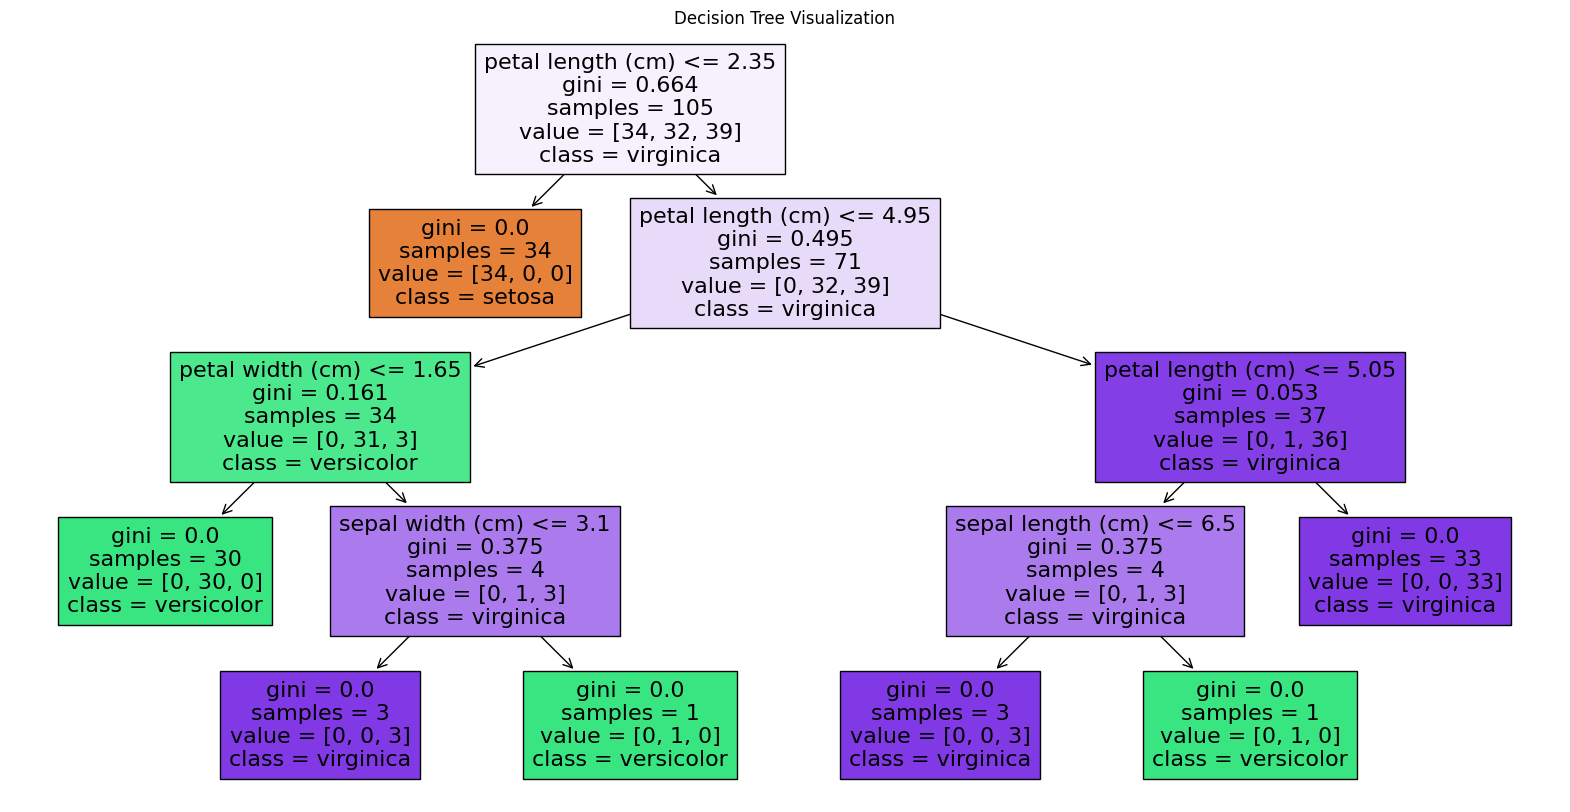

In [ ]:
# Wizualizacja drzewa decyzyjnego
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.title('Decision Tree Visualization')
plt.show()